In [4]:
pip install scikit-fuzzy

  Using cached scikit_fuzzy-0.5.0-py2.py3-none-any.whl.metadata (2.6 kB)
Using cached scikit_fuzzy-0.5.0-py2.py3-none-any.whl (920 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Célula 1: Importação das bibliotecas
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [6]:
# Célula 2: Definição das variáveis de entrada e saída
preco = ctrl.Antecedent(np.arange(40000, 100001, 1), 'preço')
consumo = ctrl.Antecedent(np.arange(11, 18, 1), 'consumo')
beneficio = ctrl.Consequent(np.arange(0, 10.5, 0.5), 'benefício')

In [7]:
# Célula 3: Definição das funções de pertinência
preco.automf(number=3, names=['baixo', 'medio', 'alto'])
consumo.automf(number=3, names=['alto', 'medio', 'baixo'])  # 'alto' consumo é ruim

beneficio['baixo'] = fuzz.trimf(beneficio.universe, [0, 2.5, 5])
beneficio['medio'] = fuzz.trimf(beneficio.universe, [2.5, 5, 7.5])
beneficio['alto'] = fuzz.trimf(beneficio.universe, [5, 7.5, 10])

c:\Users\Eduardo Zirbell\AppData\Local\Programs\Python\Python313\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


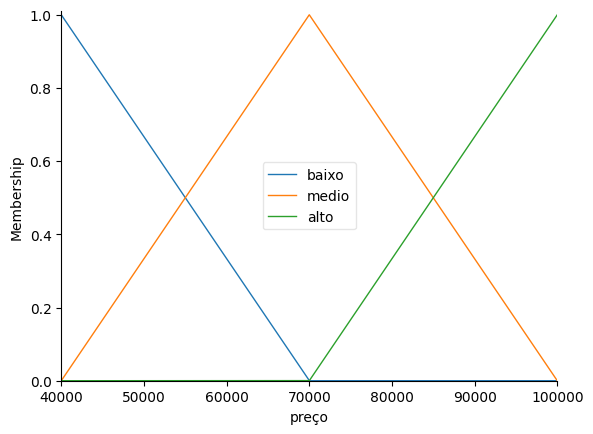

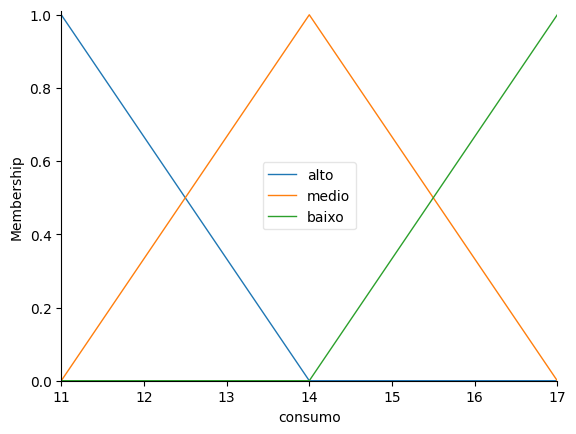

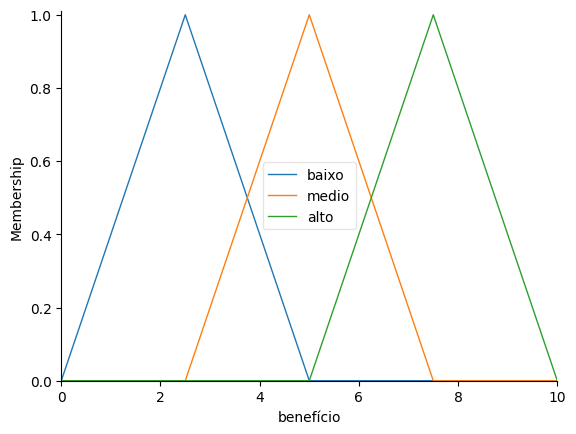

In [8]:
# Célula 4: Visualização das funções de pertinência
%matplotlib inline
preco.view()
consumo.view()
beneficio.view()
plt.show()

In [9]:
# Célula 5: Definição das regras fuzzy
regra1 = ctrl.Rule(preco['baixo'] | consumo['baixo'], beneficio['alto'])
regra2 = ctrl.Rule(preco['baixo'] | consumo['medio'], beneficio['medio'])
regra3 = ctrl.Rule(preco['medio'] | consumo['baixo'], beneficio['medio'])
regra4 = ctrl.Rule(preco['medio'] | consumo['medio'], beneficio['medio'])
regra5 = ctrl.Rule(preco['medio'] | consumo['alto'], beneficio['medio'])
regra6 = ctrl.Rule(preco['alto'] | consumo['medio'], beneficio['medio'])
regra7 = ctrl.Rule(preco['alto'] | consumo['alto'], beneficio['baixo'])
regra8 = ctrl.Rule(preco['baixo'] | consumo['alto'], beneficio['medio'])
regra9 = ctrl.Rule(preco['alto'] | consumo['baixo'], beneficio['medio'])

In [10]:
# Célula 6: Criação do sistema de controle fuzzy
recomendacao_compra = ctrl.ControlSystem([
    regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9
])
recomendacao = ctrl.ControlSystemSimulation(recomendacao_compra)

In [11]:
# Célula 7: Entradas e simulação
recomendacao.input['preço'] = 50000
recomendacao.input['consumo'] = 16
recomendacao.compute()
print(f"Benefício recomendado: {recomendacao.output['benefício']:.2f}")

Benefício recomendado: 6.25


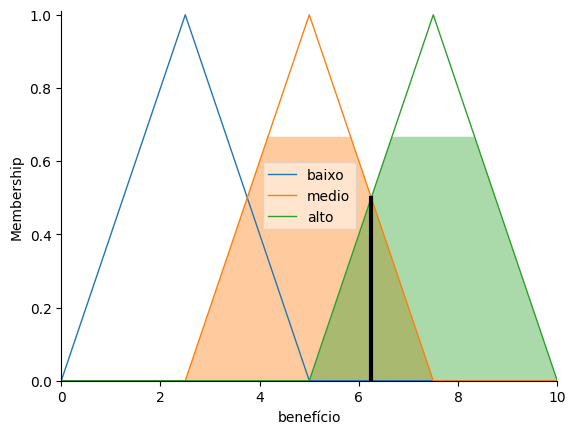

In [12]:
# Célula 8: Visualização do resultado
beneficio.view(sim=recomendacao)
plt.show()